In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Import Data Set

In [2]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('./data/X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('./data/Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [3]:
# Group data to day snapshot
X_data = np.reshape(X_data, (84,720))
print('Naive occupancy')
print(X_data.shape)
print(X_data[0][:10])


Y_data = np.reshape(Y_data, (84,720))
print('Actual occupancy')
print(Y_data.shape)
print(Y_data[0][:10])

Naive occupancy
(84, 720)
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
(84, 720)
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [4]:
# Get block names label for each of X/Y data
block_names = pd.read_csv('./data/block_names.csv')
block_names = np.array(block_names.iloc[:,1])
block_names = np.reshape(block_names, (12,7))
print(block_names[0])

['11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/22'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/23'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/24'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/25'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/26'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/28']


In [5]:
blocks_X = np.reshape(X_data, (12,7,720))
blocks_Y = np.reshape(Y_data, (12,7,720))
print(blocks_X[0,0,:10])
print(blocks_Y[0,0,:10])

[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [6]:
poly = PolynomialFeatures(degree=2)
pca = PCA(n_components=7)
lr = LinearRegression()

In [7]:
def cross_validate(poly, pca, lr, X, Y, block_names):     
    n = len(X)
    error = 0
    naive_error = 0
    time = np.arange(720)
    plt.figure(figsize=(20,14))
    pca_features = pca.fit_transform(X)
    poly_features = poly.fit_transform(pca_features)
    
    for i in range(n):
        x_test = poly_features[i].reshape(1,-1)
        x_train = np.delete(poly_features, i, 0)
        y_train = np.delete(Y, i ,0)
        plt.subplot(3, 3, i+1)
        lr.fit(x_train, y_train)
        y_predicted = lr.predict(x_test)
        plt.plot(time, y_predicted[0], color='r', label='Prediction')
        plt.plot(time, X[i], color='g', label='Naive')
        plt.plot(time, Y[i], color='b', label='Actual')
        plt.legend()
        plt.xlabel('Time (min since 8:00 am)')
        plt.xticks(np.arange(0,780,60))
        plt.ylabel('Occupancy Percentage')
        plt.title(block_names[i])
        error += np.mean(np.abs(Y[i]-y_predicted[0]))
        naive_error += np.mean(np.abs(Y[i]-X[i]))
    
    plt.tight_layout()
    plt.show()
    print("Prediction Error: ")
    print(error/n)
    print("Naive Error: ")
    print(naive_error/n)

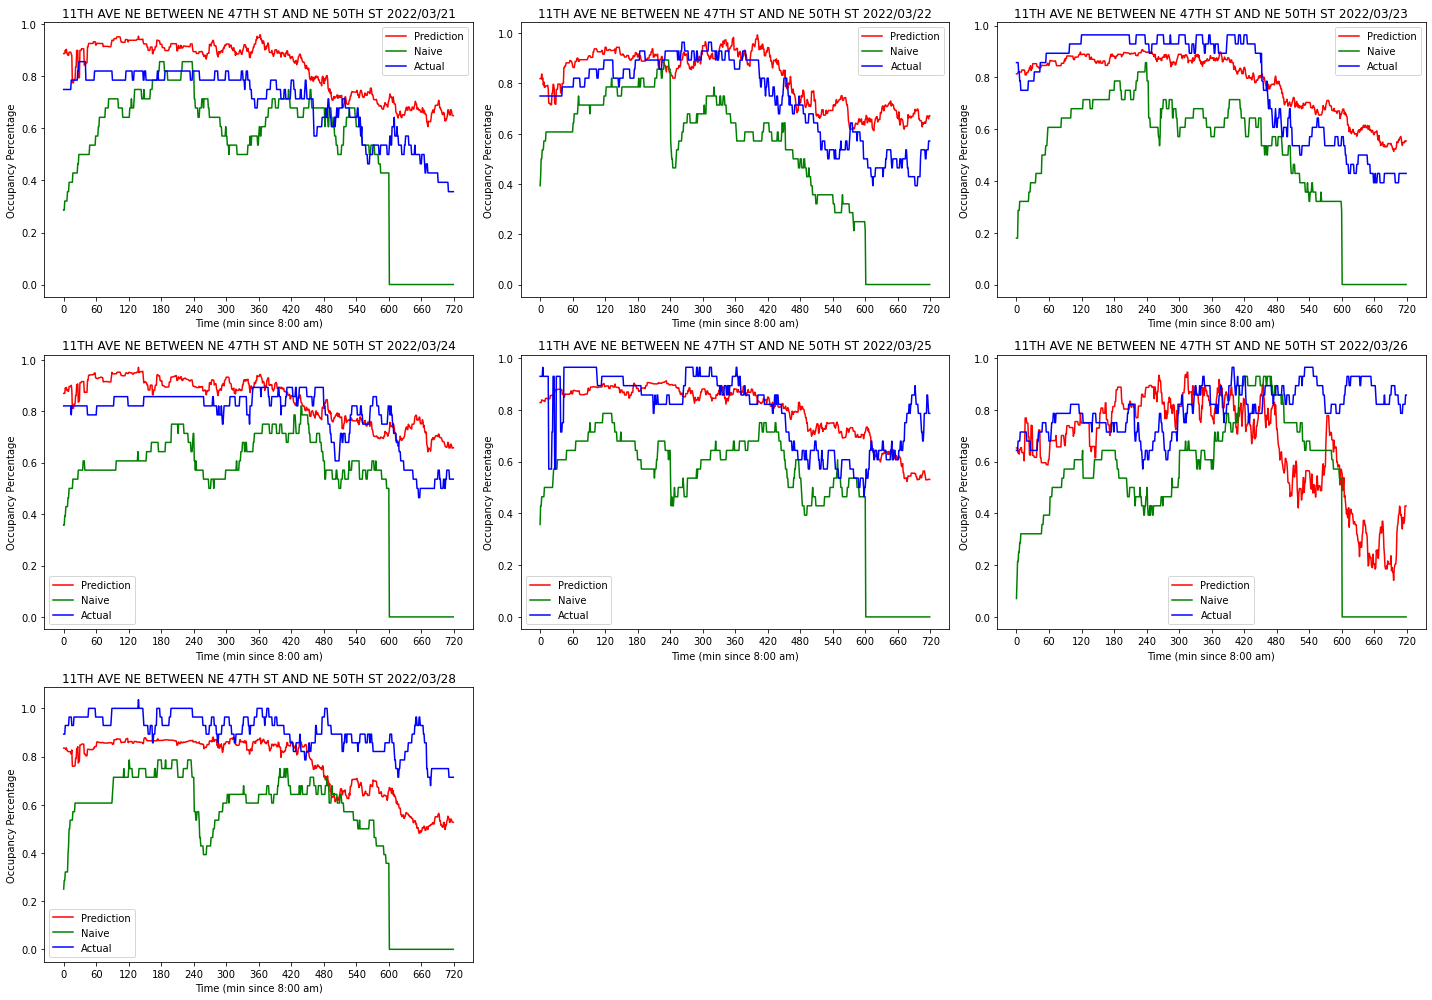

Prediction Error: 
0.1175960661446857
Naive Error: 
0.28093154761904765


In [8]:
cross_validate(poly, pca, lr, blocks_X[0], blocks_Y[0], block_names[0])

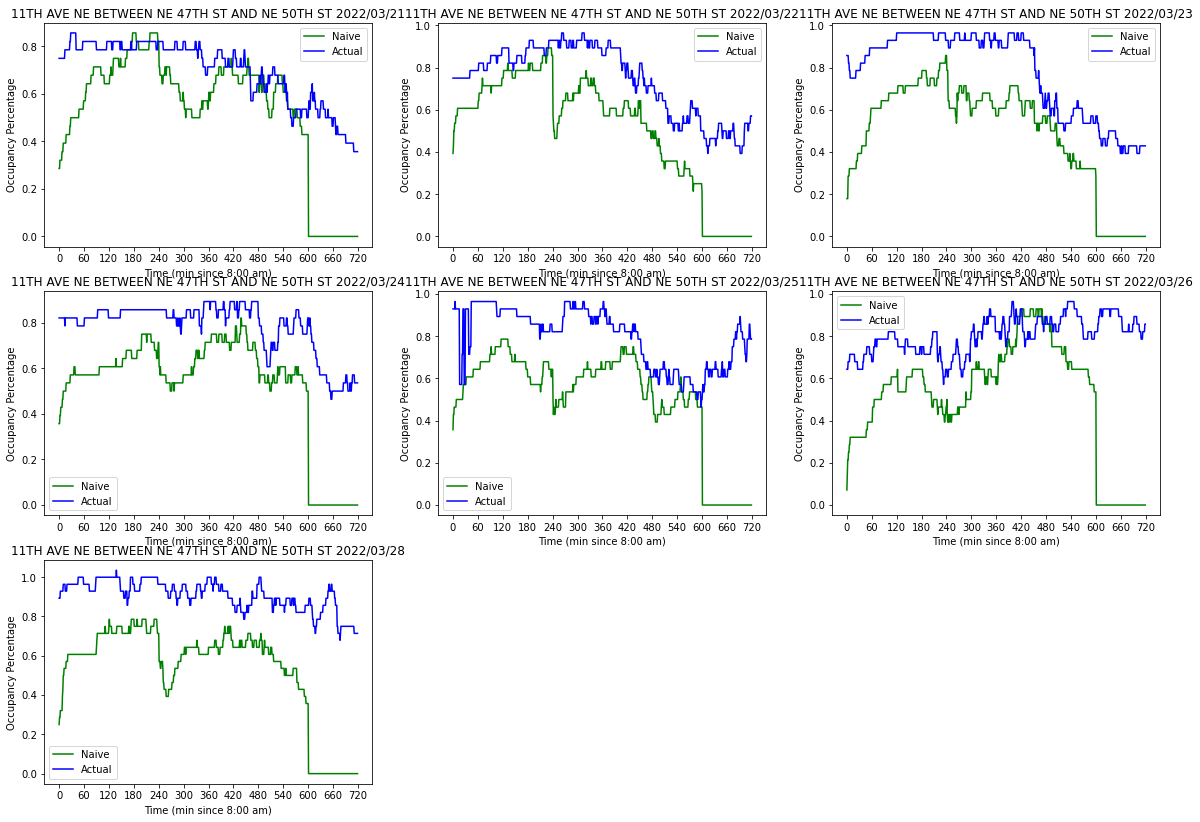

In [9]:
n = len(blocks_X[0])
time = np.arange(720)

plt.figure(figsize=(20,14))

for i in range(n):
    plt.subplot(3, 3, i+1)
    plt.plot(time, blocks_X[0][i], color='g', label='Naive')
    plt.plot(time, blocks_Y[0][i], color='b', label='Actual')
    plt.legend()
    plt.xlabel('Time (min since 8:00 am)')
    plt.xticks(np.arange(0,780,60))
    plt.ylabel('Occupancy Percentage')
    plt.title(block_names[0][i])

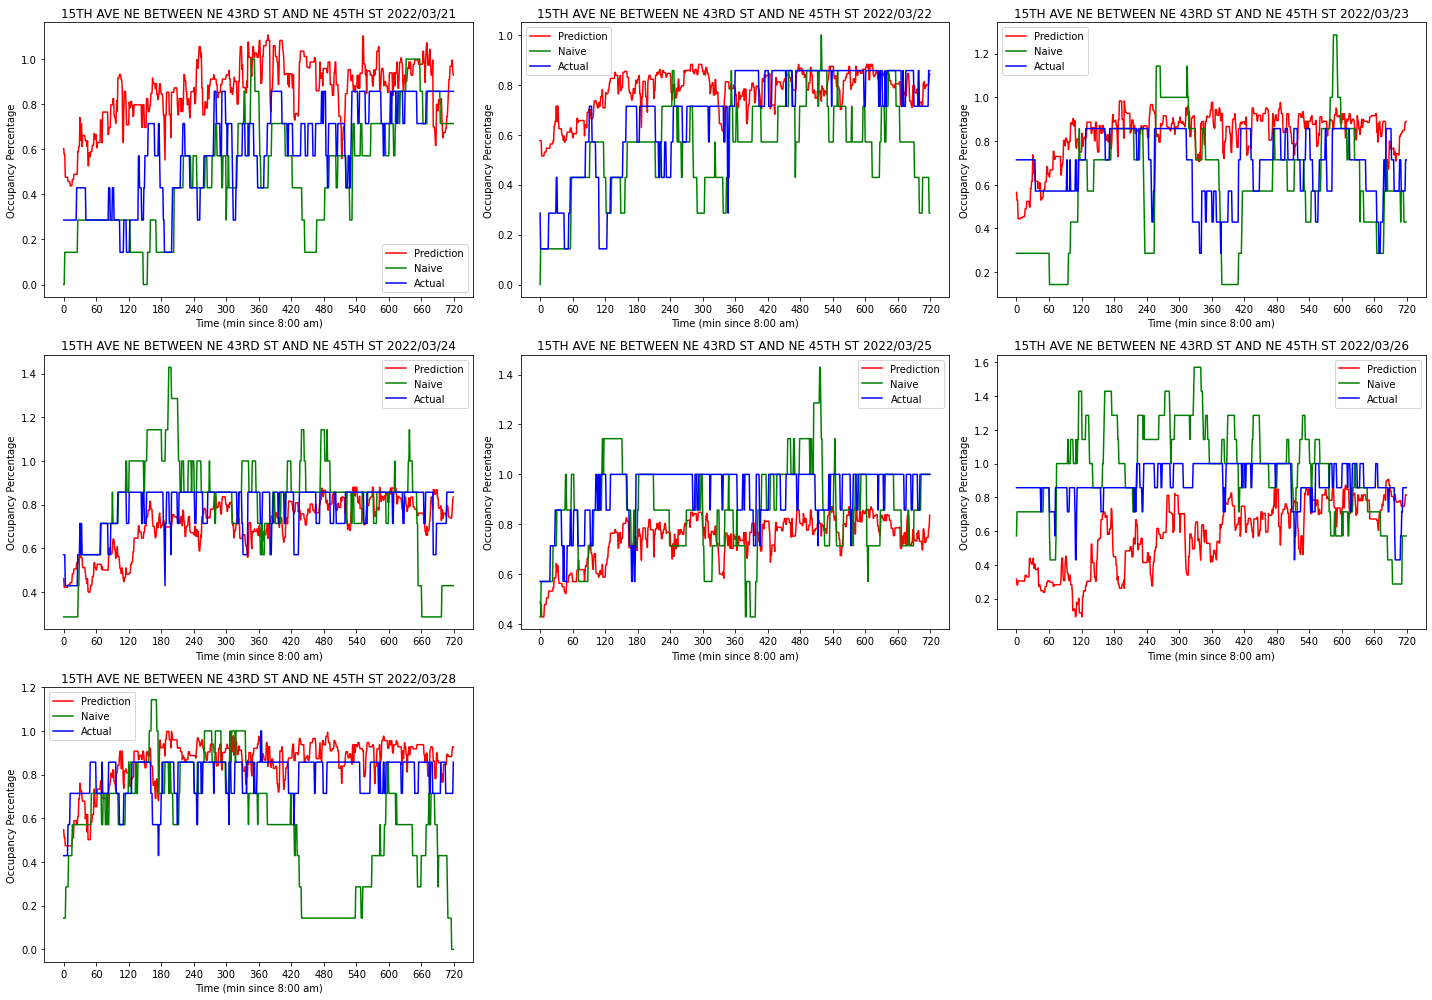

Prediction Error: 
0.18655505699018643
Naive Error: 
0.18532400793650797


In [10]:
cross_validate(poly, pca, lr, blocks_X[1], blocks_Y[1], block_names[1])

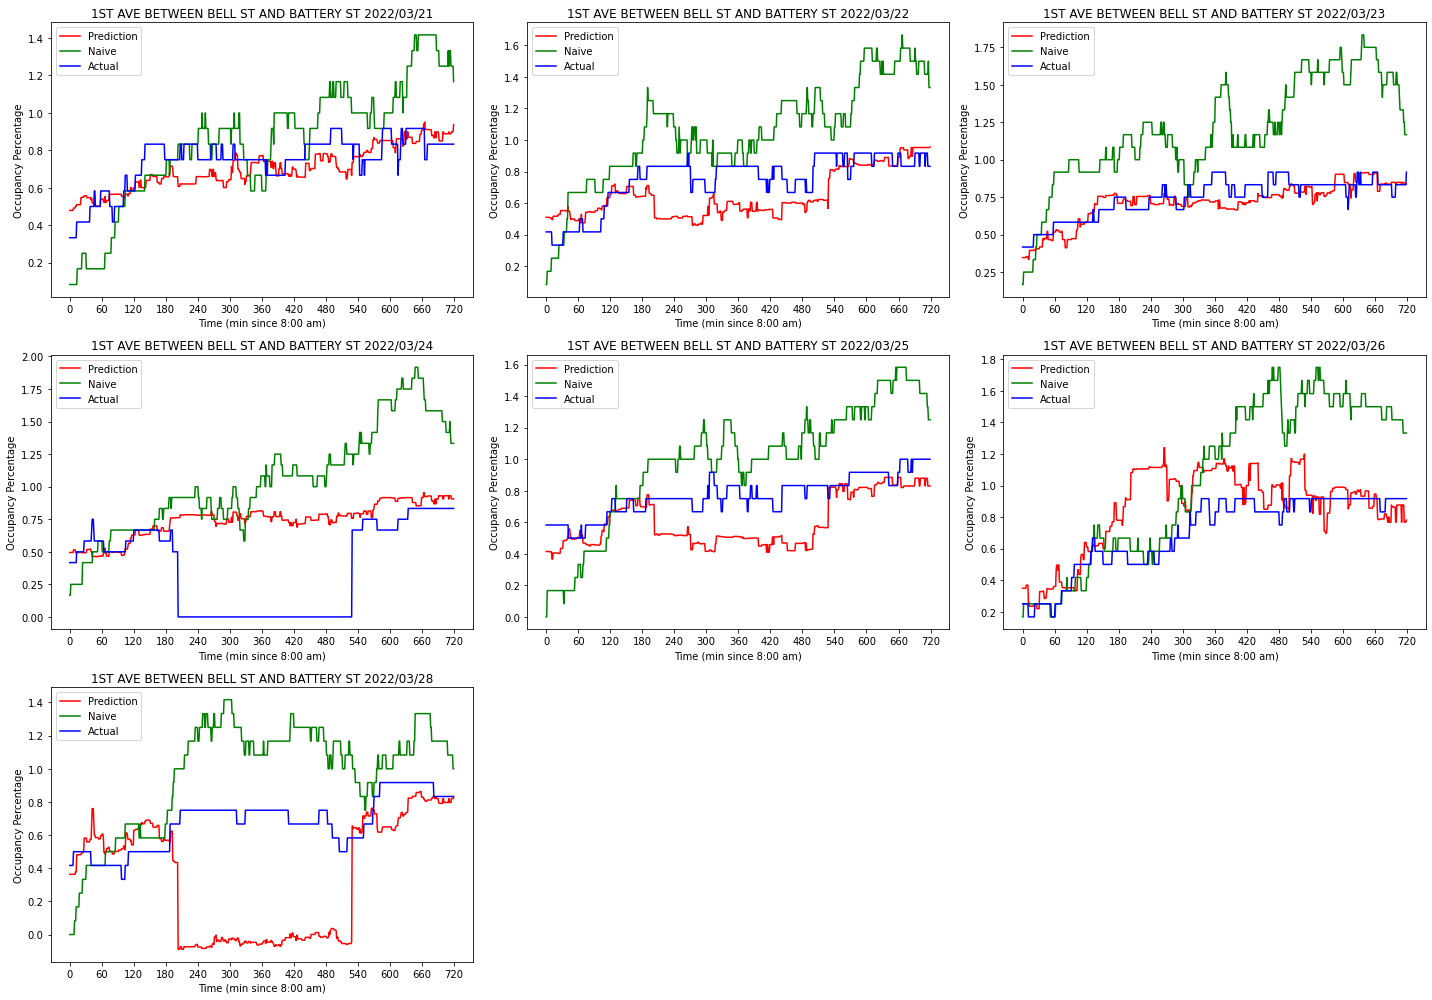

Prediction Error: 
0.20875342395843807
Naive Error: 
0.3808710317460318


In [11]:
cross_validate(poly, pca, lr, blocks_X[2], blocks_Y[2], block_names[2])

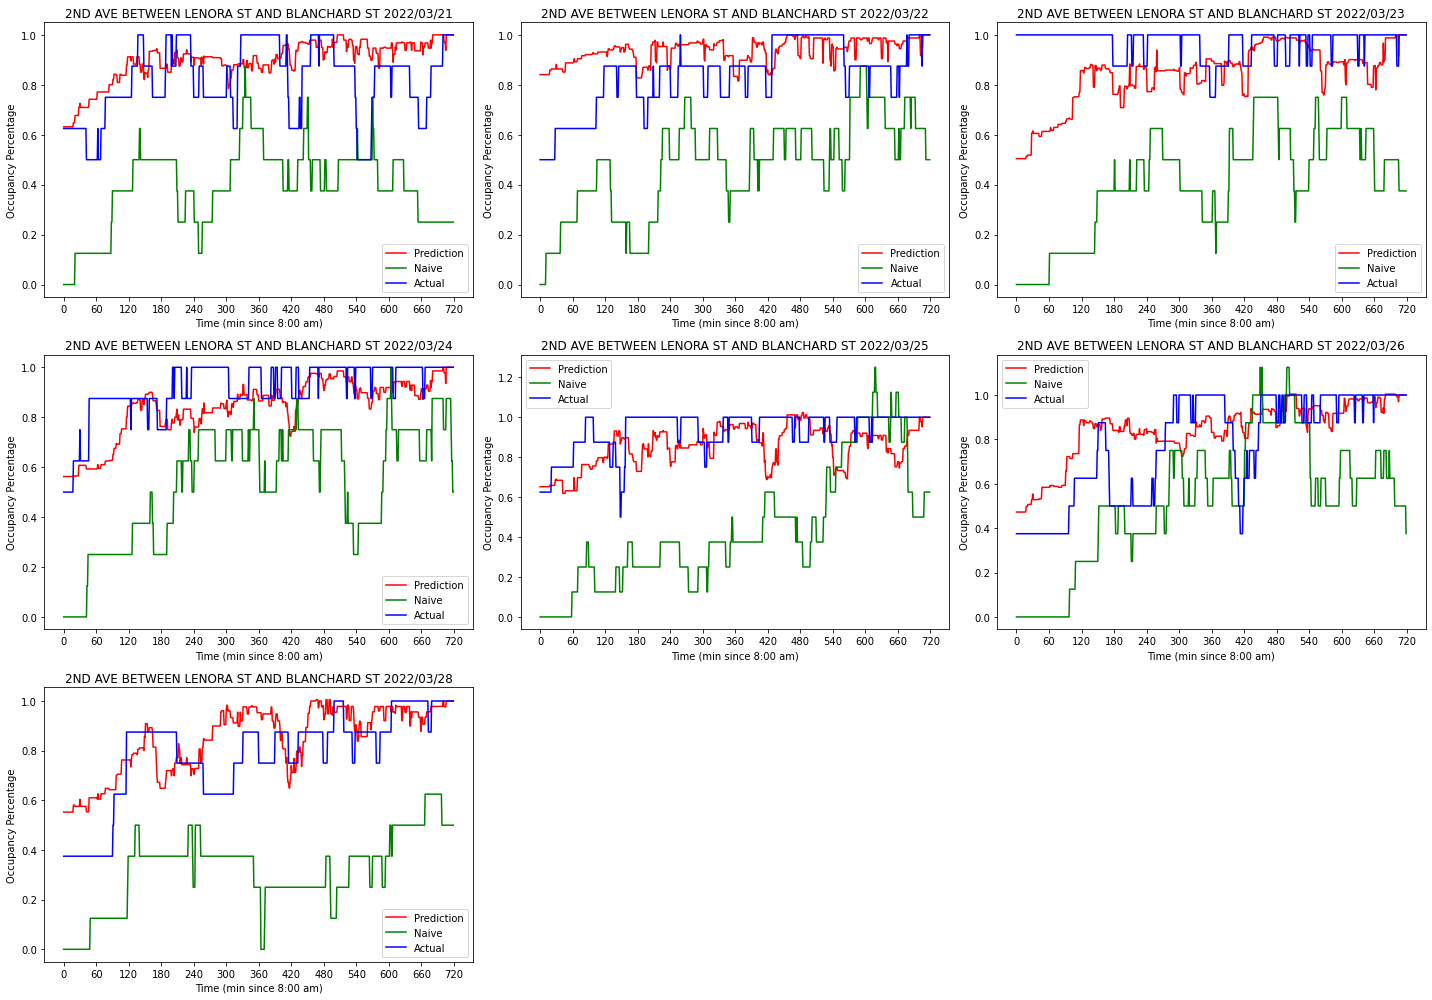

Prediction Error: 
0.12140773859688866
Naive Error: 
0.4281498015873016


In [12]:
cross_validate(poly, pca, lr, blocks_X[3], blocks_Y[3], block_names[3])

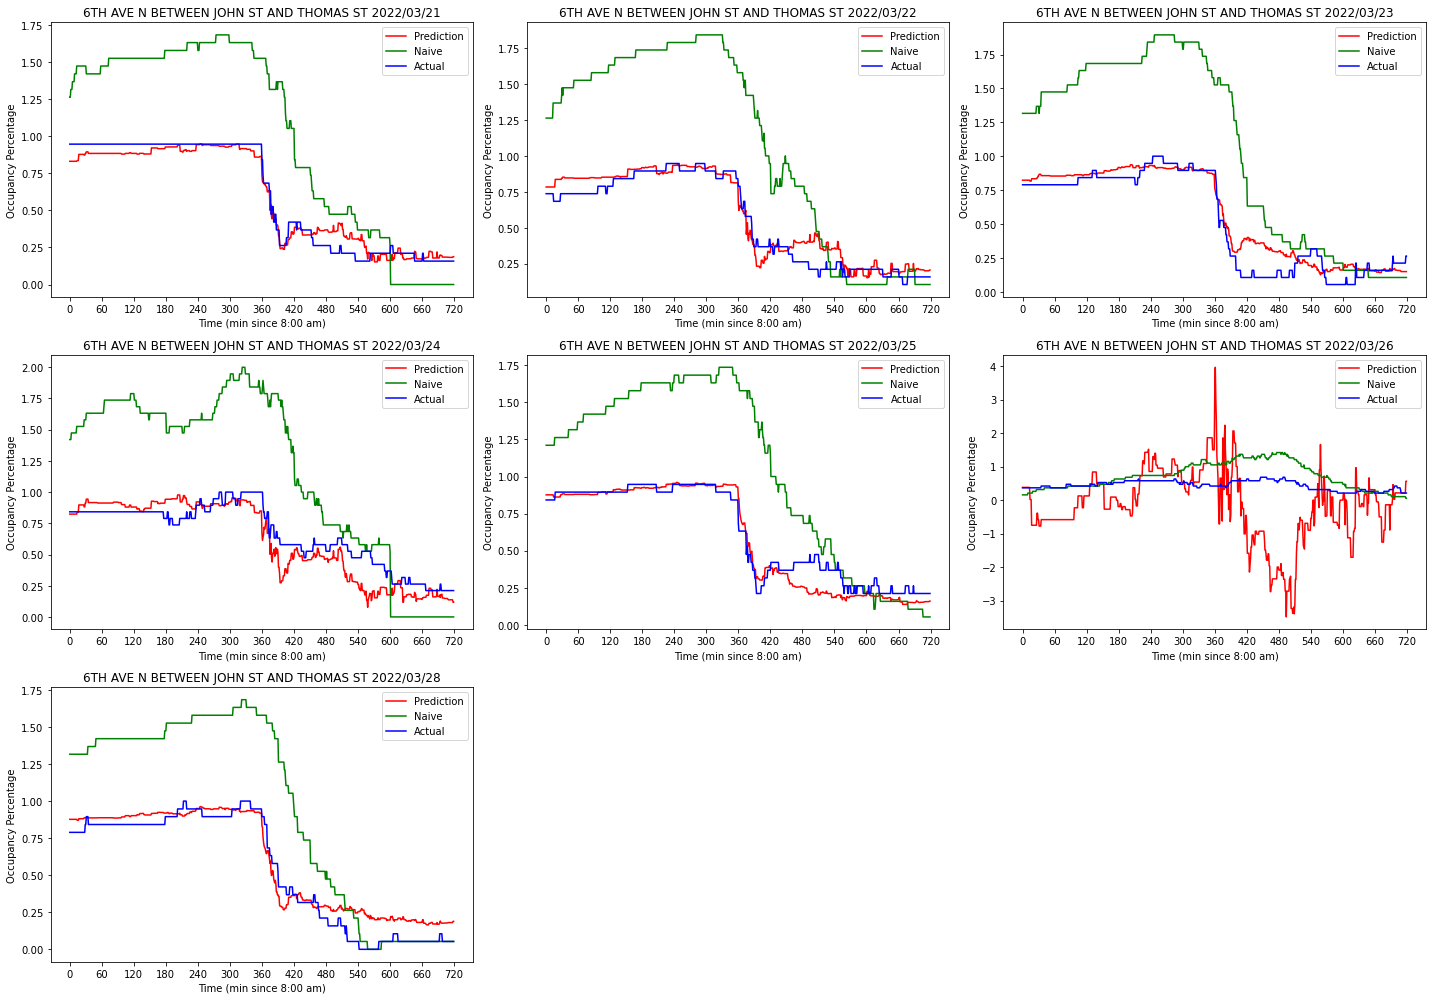

Prediction Error: 
0.18626023506071412
Naive Error: 
0.4814603174603175


In [13]:
cross_validate(poly, pca, lr, blocks_X[4], blocks_Y[4], block_names[4])

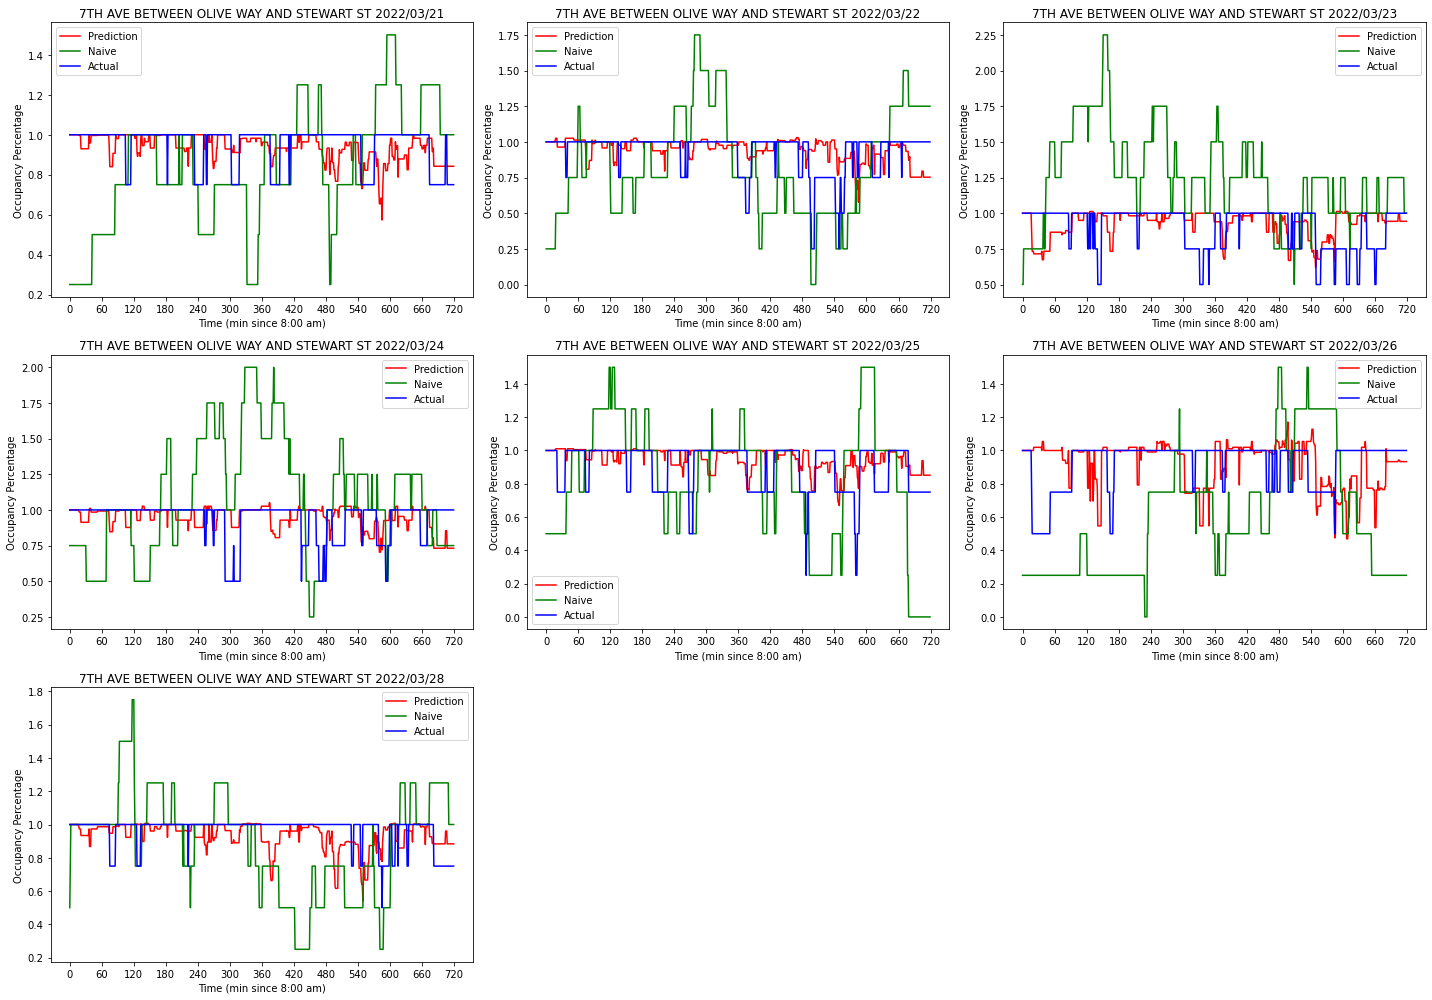

Prediction Error: 
0.10215694331102161
Naive Error: 
0.3247519841269842


In [14]:
cross_validate(poly, pca, lr, blocks_X[5], blocks_Y[5], block_names[5])

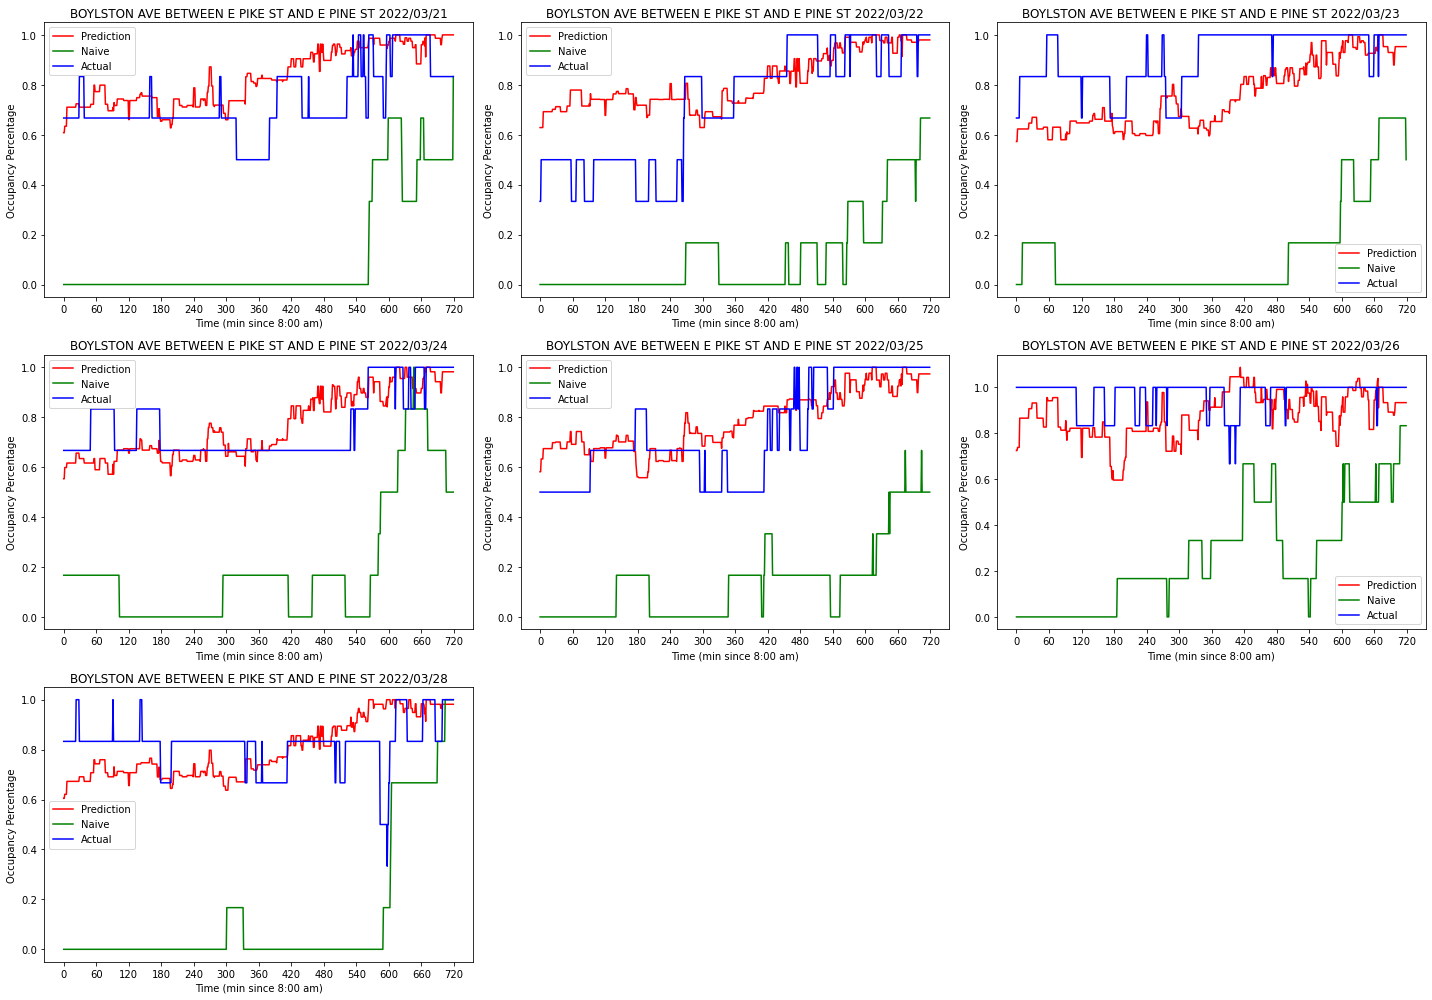

Prediction Error: 
0.12262000303479519
Naive Error: 
0.6543720238095238


In [15]:
cross_validate(poly, pca, lr, blocks_X[6], blocks_Y[6], block_names[6])

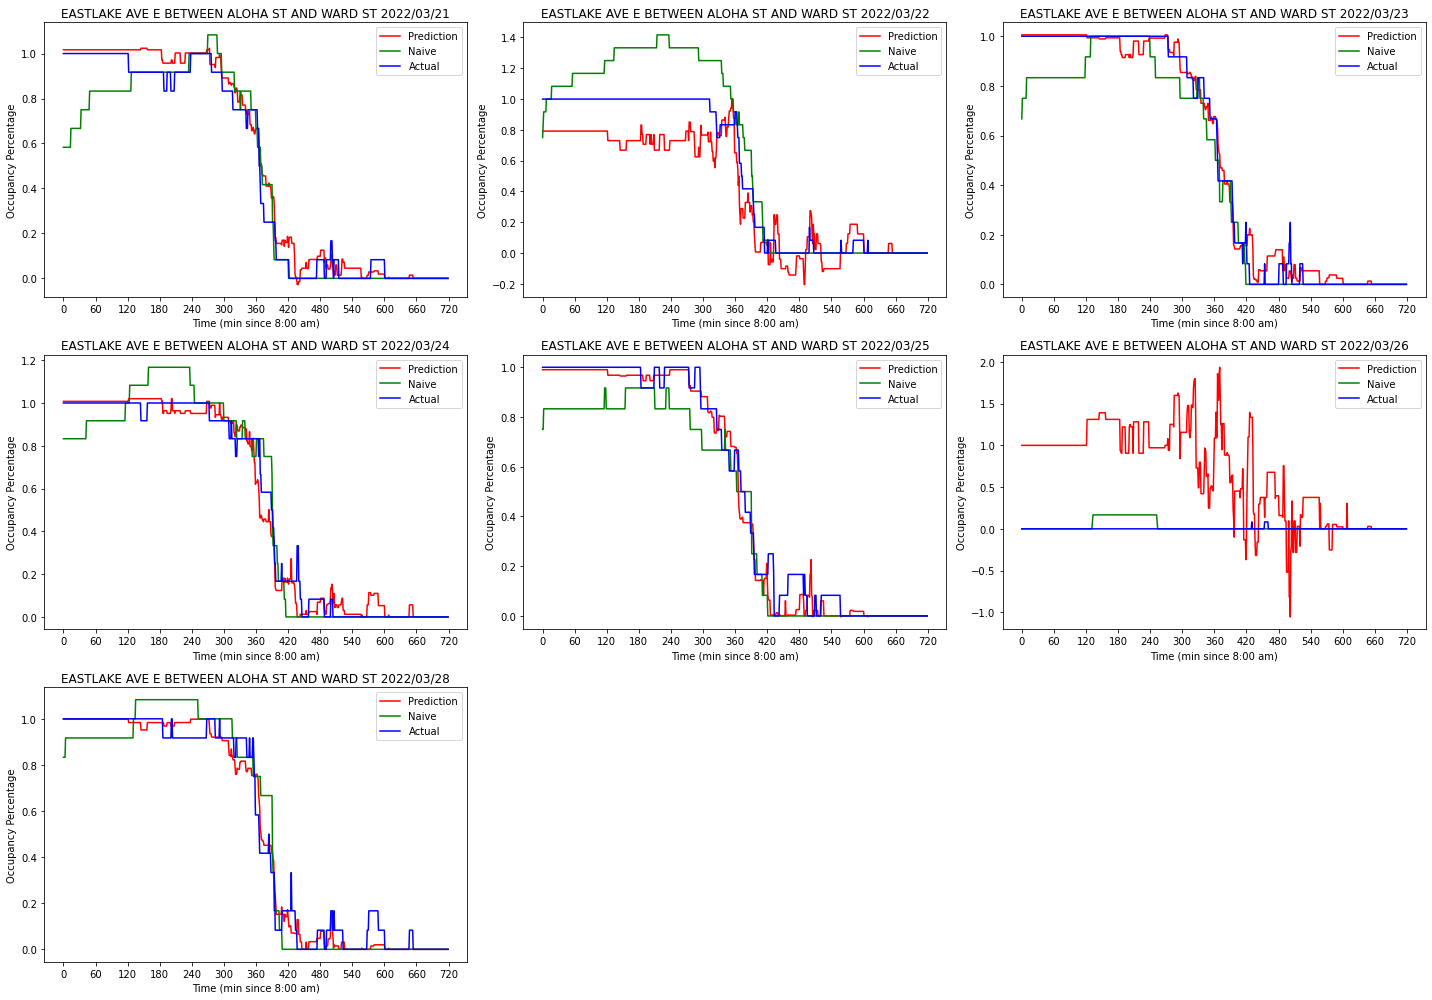

Prediction Error: 
0.14702855403510906
Naive Error: 
0.07648492063492064


In [16]:
cross_validate(poly, pca, lr, blocks_X[7], blocks_Y[7], block_names[7])

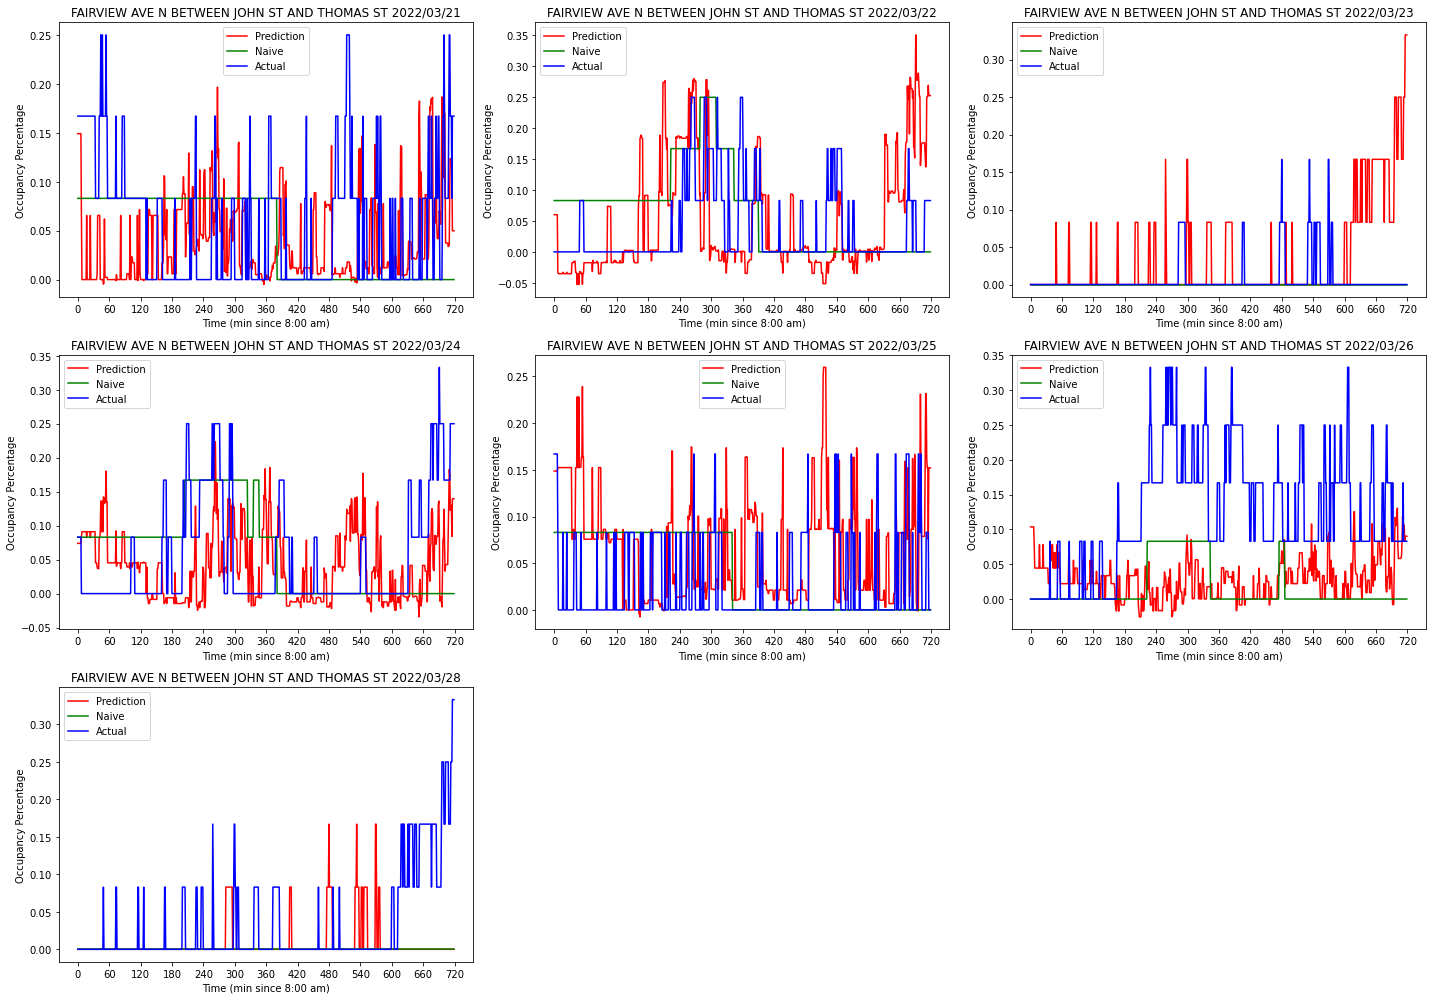

Prediction Error: 
0.06279376205148952
Naive Error: 
0.0511579365079365


In [17]:
cross_validate(poly, pca, lr, blocks_X[8], blocks_Y[8], block_names[8])

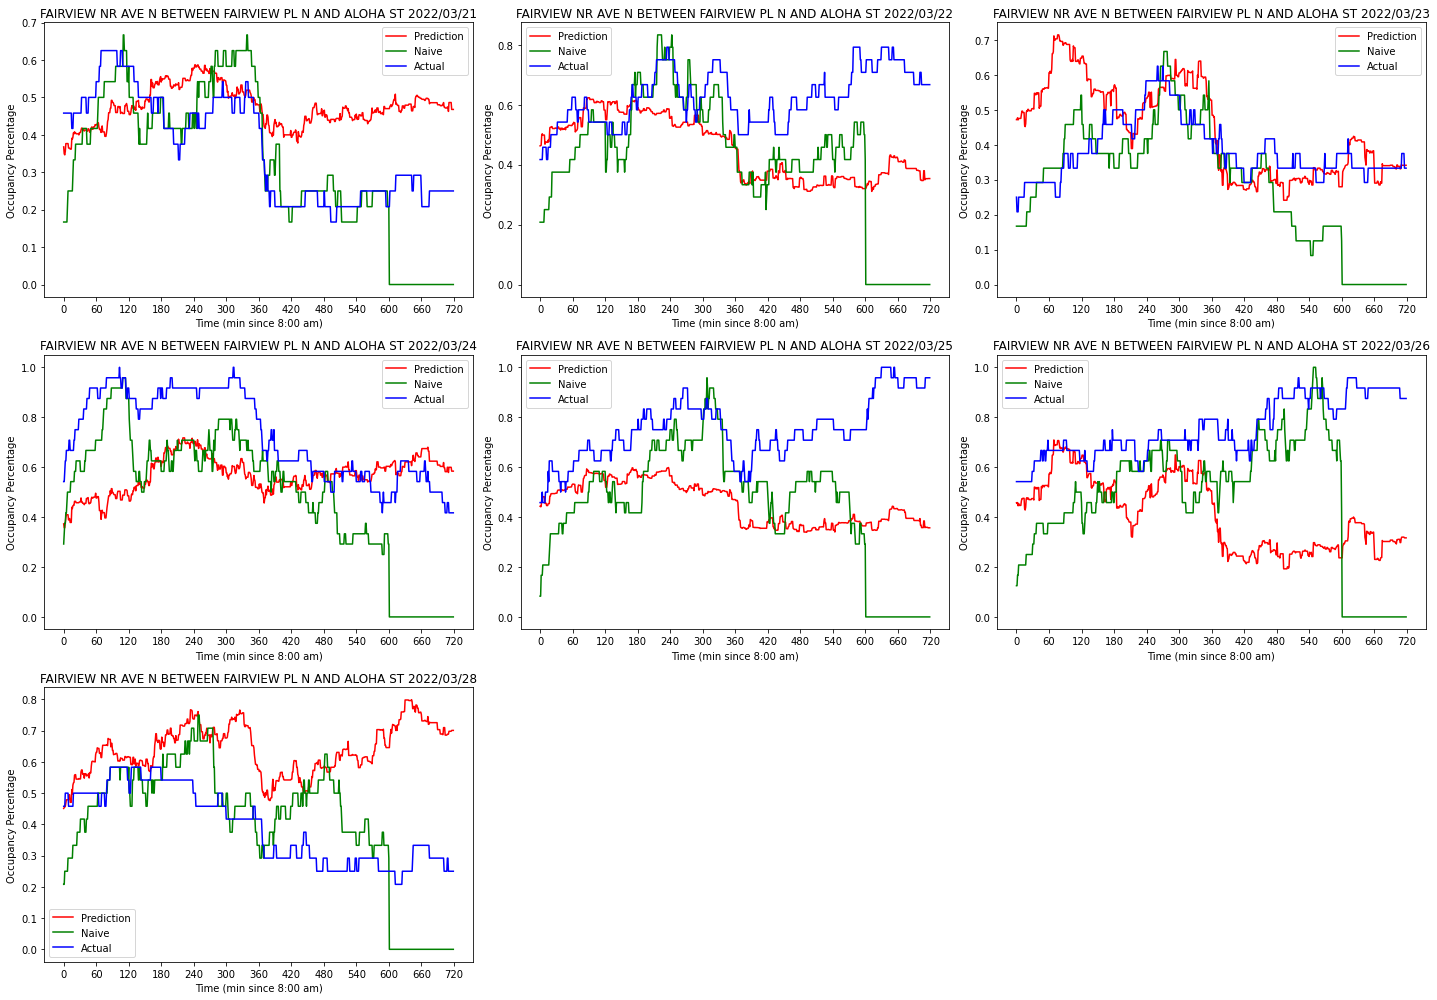

Prediction Error: 
0.21901493110223744
Naive Error: 
0.2034998015873016


In [18]:
cross_validate(poly, pca, lr, blocks_X[9], blocks_Y[9], block_names[9])

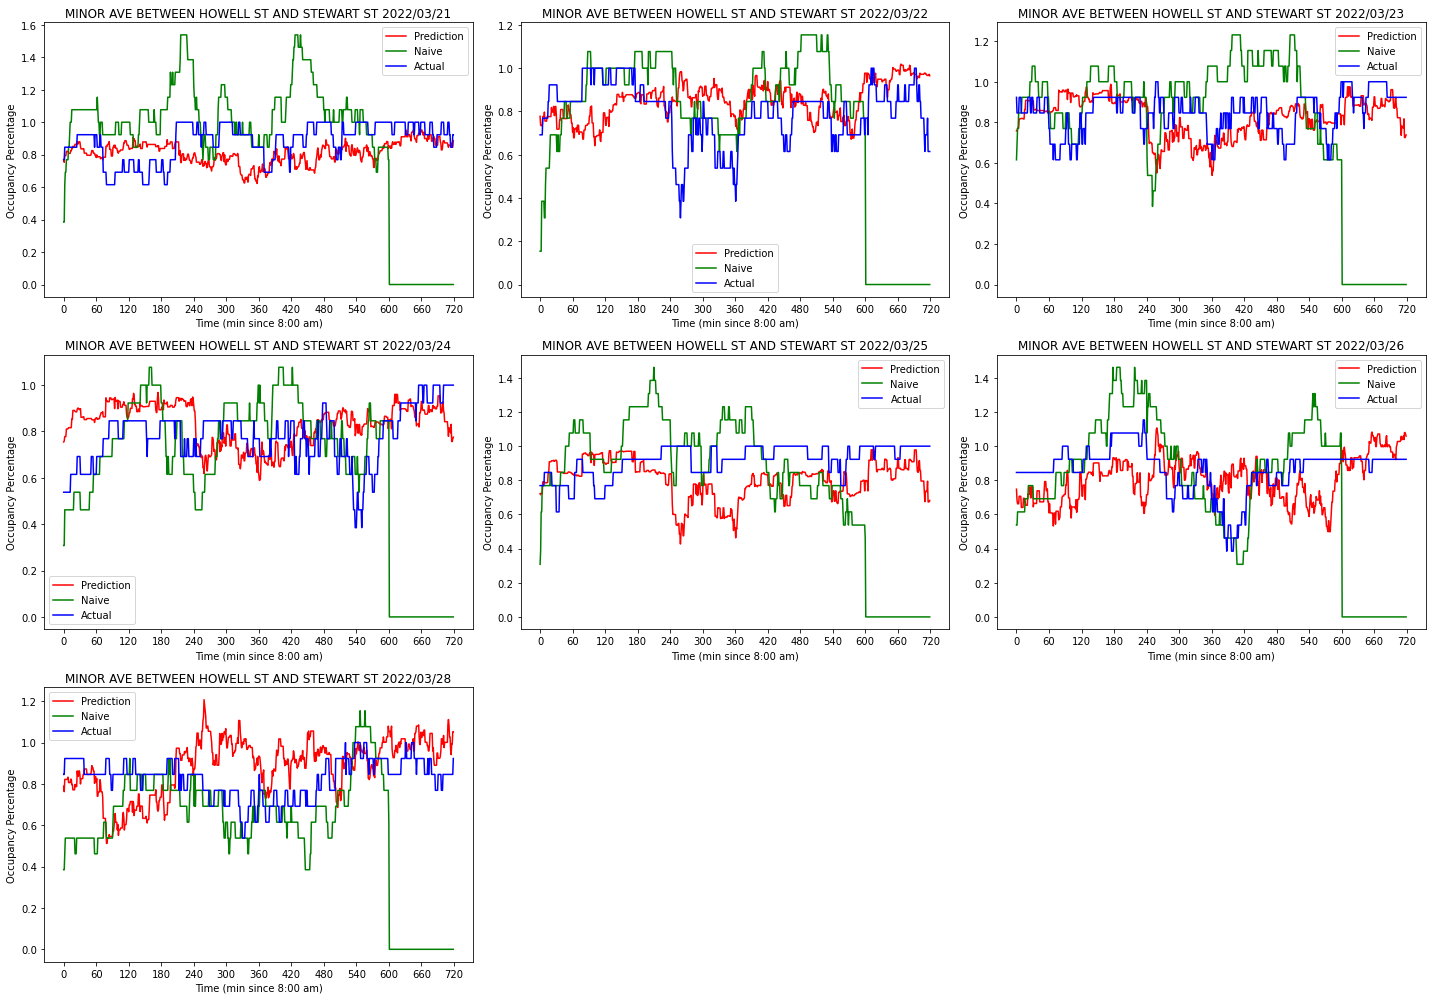

Prediction Error: 
0.13856055925606756
Naive Error: 
0.28984722222222226


In [19]:
cross_validate(poly, pca, lr, blocks_X[10], blocks_Y[10], block_names[10])

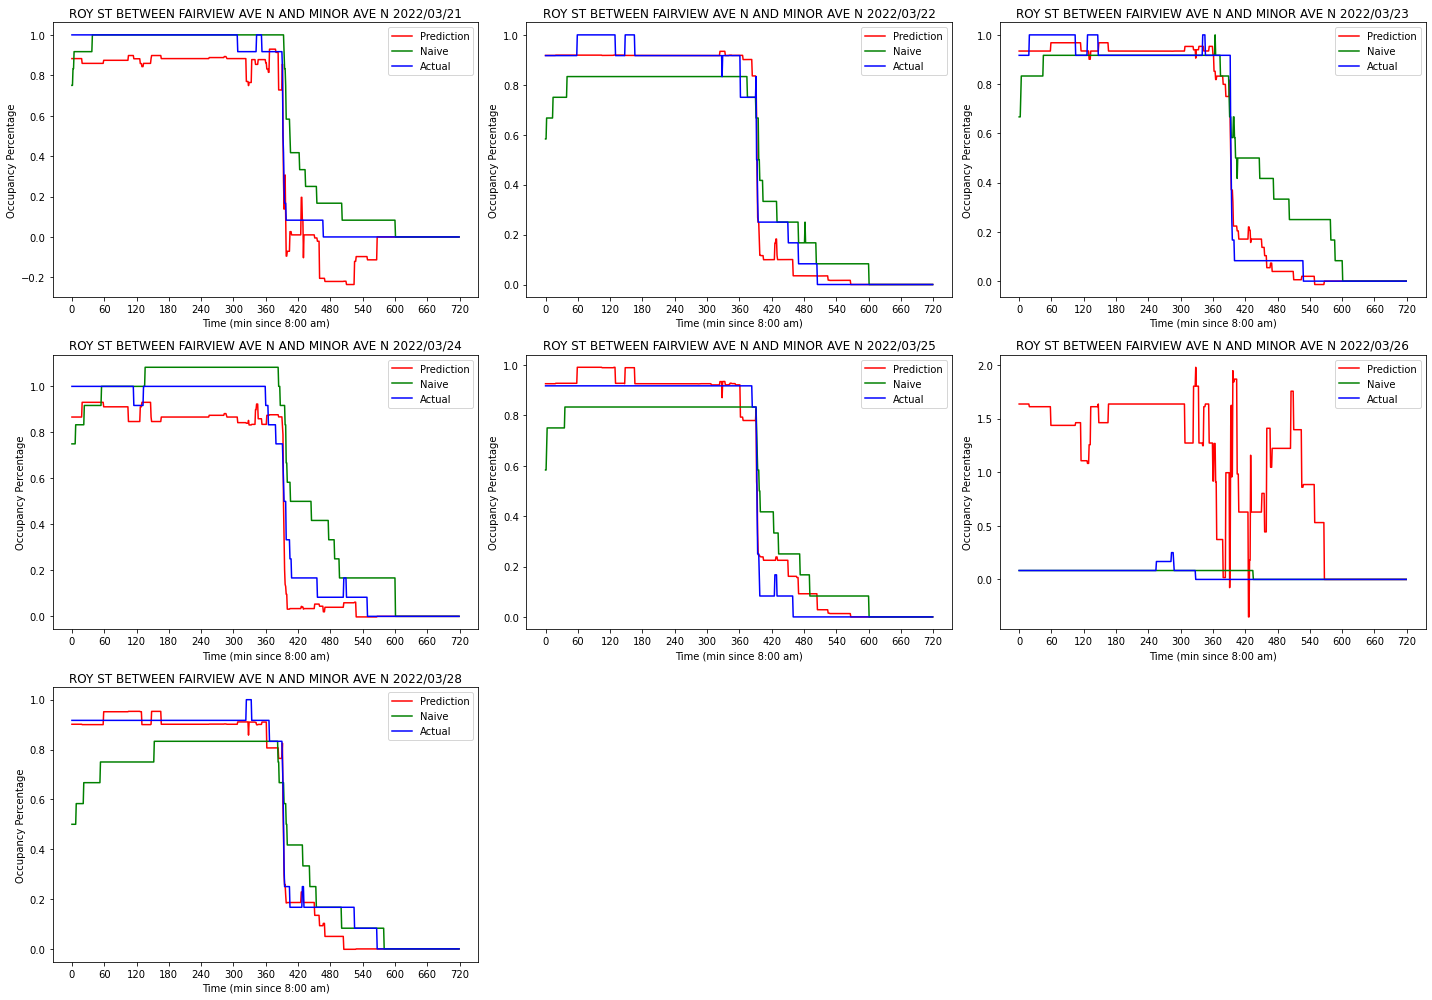

Prediction Error: 
0.18700320689830383
Naive Error: 
0.08020019841269842


In [20]:
cross_validate(poly, pca, lr, blocks_X[11], blocks_Y[11], block_names[11])